## Functional annotation of TotalRNA against CAZy

This notebook is part of the analysis of the TotalRNA   mRNA genes from Trinity.

## How to run Jupyter notebooks in huginn
If you use vs-code you can use the [remote ssh extension](https://marketplace.visualstudio.com/items?itemName=ms-vscode-remote.remote-ssh) to connect to huginn and either run jupyterlab in the remote server (so to say, just like you would do in your local computer with `jupyter-lab`) or run directly without opening jupyterlab directly. 

Otherwise, you can follow the instructions below: 

1. Turn on VPN
2. Open two terminals (let's called A and B)
3. With terminal A, connect to huginn with ssh as usual
```bash
ssh username@huginn.au.dk
```
4. Move to the directory where you want to work and run jupyter-lab
```bash
jupyter lab --no-browser --port=7777
```
5. With terminal B, connect to huginn and forward the port specified port to your local computer
```bash
ssh -Y -N -L localhost:7777:localhost:7777 username@huginn.au.dk
```

## How to create a new environment for this notebook (if needed)

We will use Diamond, a few python basic libraries and bash. Let's check if those dependencies are installed. If not, you can install them with mamba (as well with jupyterlab)

```bash
# To create a new environment with mamba
mamba create -c bioconda -c conda-forge diamond pandas matplotlib jupyterlab -n jupyter-diamond7
# To activate the environment
conda activate jupyter-diamond7
```

In [9]:
%%bash
diamond --version
python -c "import pandas; print(pandas.__version__)"
python -c "import matplotlib; print(matplotlib.__version__)"
bash --version | head -n 1

diamond version 2.1.6
1.5.2
3.7.1
GNU bash, version 4.4.20(1)-release (x86_64-pc-linux-gnu)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

The input is the fasta file of the TotalRNA mRNA genes from Trinity and the count table. 

In [35]:
trinity_file = "../results/mRNA/mapped_reads_to_contigs_AbundanceFiltered_contigs_ncrna_filtered.fasta"
count_table = "../results/mRNA/mapped_reads_to_contigs_AbundanceFiltered.tsv"
## Sanity check: trinity and count table exit
assert os.path.exists(trinity_file), "Trinity file does not exist"
assert os.path.exists(count_table), "Count table does not exist"

## Run Diamond 

In [36]:
database = "/Databases/CAZy/CAZyDB.07312019.dmnd"
descriptions_tsv = "/Databases/CAZy/CAZyDB.07302020.fam-activities.tsv"
outfile_matches = "../results/mRNA/diamond/CAZy_matches.tsv"

In [37]:
%%bash
mkdir -p ../results/mRNA/diamond

In [38]:
%%bash -s "$database" "$trinity_file" "$outfile_matches"
if [ ! -f $3 ]; then
diamond blastx -p 50 -d $1 -q $2 -o $3 2> /dev/null
fi
head $3

TRINITY_DN269244_c0_g1_i1	AWG45924.1|PL9|	58.3	115	41	3	46	369	11	125	9.88e-26	104
TRINITY_DN269244_c0_g1_i1	AWL05289.1|PL9|	50.5	111	52	2	46	372	10	119	1.18e-17	82.0
TRINITY_DN205872_c0_g1_i1	AWP12966.1|GT68|	31.0	84	57	1	3	254	3417	3499	7.76e-04	41.2
TRINITY_DN202954_c0_g1_i1	ADP19604.1|GT2|	62.1	29	11	0	107	193	287	315	6.65e-05	43.9
TRINITY_DN202954_c0_g1_i1	ABJ81659.1|GT2|	36.1	61	39	0	14	196	253	313	2.33e-04	42.4
TRINITY_DN207680_c0_g1_i1	AWZ15263.1|GH16|	40.5	116	53	6	25	336	99	210	1.72e-10	61.2
TRINITY_DN207680_c0_g1_i1	AWZ04061.1|GH16|	40.5	116	53	6	25	336	99	210	1.72e-10	61.2
TRINITY_DN207680_c0_g1_i1	BAG21593.1|GH16|	39.7	116	54	6	25	336	118	229	5.96e-10	59.7
TRINITY_DN207680_c0_g1_i1	AUG75119.1|GH16|	37.9	103	56	3	25	318	80	179	8.12e-10	59.3
TRINITY_DN207680_c0_g1_i1	ARI54412.1|GH16|	40.0	100	50	5	25	306	96	191	2.06e-09	58.2


## Parse Diamond output and preprocess

In [39]:
diamond = pd.read_csv(
    outfile_matches,
    delimiter="\t",
    comment="#",
    header=None,
    names=[
        "Query id",
        "Subject id",
        "% identity",
        "alignment length",
        "mismatches",
        "gap openings",
        "q. start",
        "q. end",
        "s. start",
        "s. end",
        "e-value",
        "score",
    ],
)

Now, we have a table with all the alignments between our "genes" and the database.

In [40]:
diamond

,Query id,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
0,TRINITY_DN269244_c0_g1_i1,AWG45924.1|PL9|,58.3,115,41,3,46,369,11,125,9.880000e-26,104.0
1,TRINITY_DN269244_c0_g1_i1,AWL05289.1|PL9|,50.5,111,52,2,46,372,10,119,1.180000e-17,82.0
2,TRINITY_DN205872_c0_g1_i1,AWP12966.1|GT68|,31.0,84,57,1,3,254,3417,3499,7.760000e-04,41.2
3,TRINITY_DN202954_c0_g1_i1,ADP19604.1|GT2|,62.1,29,11,0,107,193,287,315,6.650000e-05,43.9
4,TRINITY_DN202954_c0_g1_i1,ABJ81659.1|GT2|,36.1,61,39,0,14,196,253,313,2.330000e-04,42.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2973,TRINITY_DN495602_c0_g1_i1,AZH82696.1|PL33_1|,47.7,195,92,3,2,559,197,390,2.050000e-52,181.0
2974,TRINITY_DN495602_c0_g1_i1,AXG82304.1|PL33_1|,47.6,189,92,1,2,547,192,380,5.020000e-52,180.0
2975,TRINITY_DN495602_c0_g1_i1,ASN22595.1|PL33_1|,52.3,172,80,2,2,517,202,371,6.810000e-52,180.0
2976,TRINITY_DN495602_c0_g1_i1,APU22917.1|PL33_1|,50.0,184,88,2,2,547,226,407,4.000000e-51,179.0


## Read count table
However, we also need to read the count table:

In [41]:
%%bash -s "$count_table"
head $1

ContigID	ML5	ML18	ML21	ML20	ML29	ML25	ML1	ML24	ML13	ML19	ML17	ML16	ML6	ML27	ML8	ML14	ML9	ML22	ML4	ML23	ML11	ML26	ML30	ML12	ML3	ML10	ML2	ML28	ML15	ML7
TRINITY_DN114685_c0_g1_i1	10	0	0	0	1	0	8	0	16	0	0	2	18	0	12	4	18	0	0	0	132	11	0	20	14	16	10	0	6	0
TRINITY_DN5918_c0_g4_i1	188	326	0	0	32	130	437	8	93	3	213	314	161	0	180	84	103	44	50	15	72	68	20	102	346	156	182	3	207	125
TRINITY_DN558_c0_g2_i2	3	67	0	0	22	39	18	14	9	0	50	29	10	1	4	3	7	35	3	6	7	9	18	15	15	12	21	0	14	42
TRINITY_DN1239_c0_g1_i3	60	40	0	0	21	34	98	2	18	0	53	21	78	0	28	8	12	111	8	2	15	10	16	21	70	41	54	0	25	44
TRINITY_DN405074_c0_g1_i1	1	10	0	0	2	1	14	18	0	0	8	15	5	0	2	6	2	2	0	14	0	2	7	1	2	1	1	0	5	4
TRINITY_DN41560_c1_g2_i1	84	112	0	0	22	60	167	7	59	5	74	172	71	0	62	45	37	30	24	19	33	34	11	34	154	50	81	0	98	85
TRINITY_DN8447_c0_g1_i1	20	32	111	167	145	85	275	0	221	475	30	110	10	290	66	167	469	112	48	2	112	164	98	4	470	25	1205	227	48	116
TRINITY_DN769_c0_g1_i11	73	139	0	0	33	85	77	31	47	10	96	232	76	1	20	26	66	39	27	13	23	30	20

In [42]:
counts = pd.read_csv(count_table, sep="\t", comment="#").set_index("ContigID")
counts

,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,ML19,...,ML11,ML26,ML30,ML12,ML3,ML10,ML2,ML28,ML15,ML7
ContigID,,,,,,,,,,,,,,,,,,,,,
TRINITY_DN114685_c0_g1_i1,10,0,0,0,1,0,8,0,16,0,...,132,11,0,20,14,16,10,0,6,0
TRINITY_DN5918_c0_g4_i1,188,326,0,0,32,130,437,8,93,3,...,72,68,20,102,346,156,182,3,207,125
TRINITY_DN558_c0_g2_i2,3,67,0,0,22,39,18,14,9,0,...,7,9,18,15,15,12,21,0,14,42
TRINITY_DN1239_c0_g1_i3,60,40,0,0,21,34,98,2,18,0,...,15,10,16,21,70,41,54,0,25,44
TRINITY_DN405074_c0_g1_i1,1,10,0,0,2,1,14,18,0,0,...,0,2,7,1,2,1,1,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN61995_c0_g1_i1,24,23,0,0,7,28,27,0,4,0,...,8,13,5,2,39,15,35,0,9,12
TRINITY_DN7068_c0_g1_i3,0,0,52,10,36,35,0,25,5,5,...,0,0,15,0,0,0,0,132,0,0
TRINITY_DN1799_c0_g1_i8,1,3,12,164,34,6,2,11,0,103,...,1,2,6,1,0,0,3,540,3,1


## Preprocessing
### Most significant hit per Contig

Now, we need to get the most significant hit per each contig ID. Let's inspect how many hits there are per contig (adjust the number of bins). 

Text(0.5, 1.0, 'Number of hits per contig')

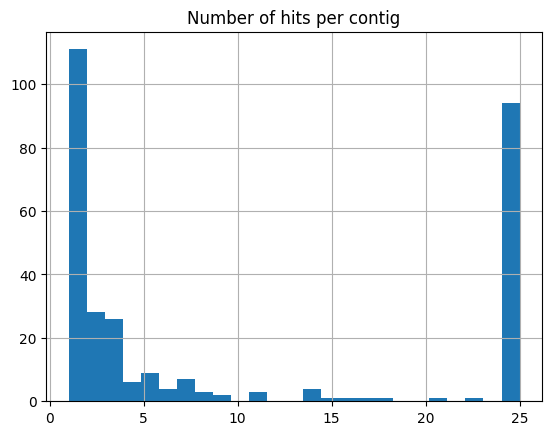

In [43]:
diamond.pivot_table(columns=["Query id"], aggfunc="size").hist(bins=25)
plt.title("Number of hits per contig")

In this case, we are going to sort rows per e-value and score and get the most significant hit per each ContigId.

In [44]:
diamond = (
    diamond.sort_values(by=["e-value", "score"], ascending=[True, False])
    .drop_duplicates("Query id", keep="first")
    .set_index("Query id")
)
diamond

,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
Query id,,,,,,,,,,,
TRINITY_DN8333_c0_g1_i5,BAJ97774.1|GT2|,99.9,1091,1,0,280,3552,1,1091,0.000000e+00,2266.0
TRINITY_DN26643_c0_g1_i3,AAO46087.1|GT48|,98.5,717,11,0,3,2153,745,1461,0.000000e+00,1403.0
TRINITY_DN14208_c0_g1_i5,AHG54199.1|CBM57,80.1,959,172,7,1,2835,61,1014,0.000000e+00,1314.0
TRINITY_DN12939_c0_g1_i1,BAB82469.1|GH32|2.4.1.10,98.4,616,10,0,52,1899,1,616,0.000000e+00,1244.0
TRINITY_DN15106_c0_g1_i2,CCV01574.1|GT47|,98.3,421,7,0,212,1474,1,421,9.230000e-316,860.0
...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN15420_c0_g1_i3,BBE49946.1|GT41|,73.9,23,6,0,983,1051,6,28,5.230000e-04,47.4
TRINITY_DN5377_c0_g1_i5,ALO66323.1|GH25|,41.9,43,24,1,27,155,517,558,6.310000e-04,40.8
TRINITY_DN3694_c0_g1_i1,BAY95497.1|GT1|,41.0,61,34,2,8,190,1363,1421,7.210000e-04,40.8


### Inspect E-values from aligned orthologous genes before filtering by e-value

array([[<Axes: title={'center': 'e-value'}>]], dtype=object)

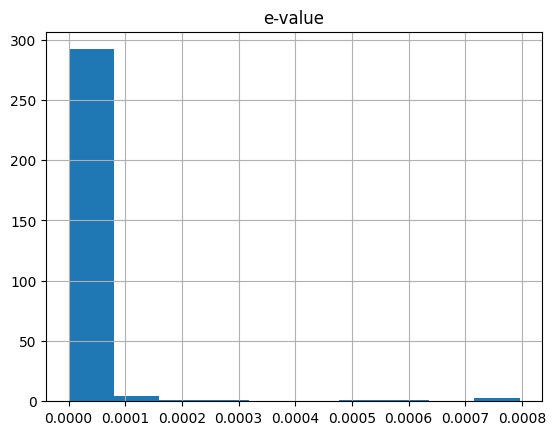

In [45]:
diamond.hist("e-value")

### Inspect E-values from aligned orthologous genes after filtering by e-value

We need to set a threshold:

In [46]:
evalue_threshold = 0.0001

In [47]:
diamond = diamond.loc[diamond["e-value"] < evalue_threshold]

array([[<Axes: title={'center': 'e-value'}>]], dtype=object)

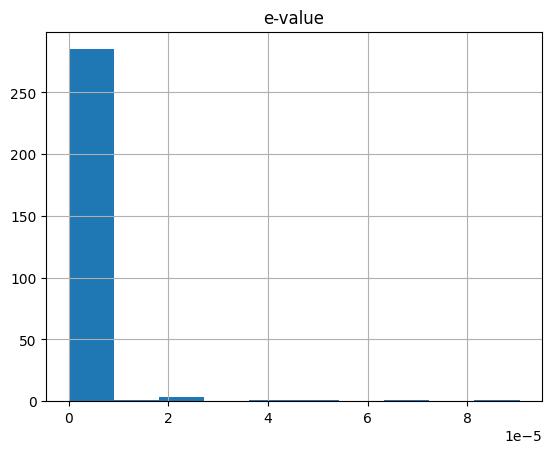

In [48]:
diamond.hist("e-value")

In [49]:
val = len(set(diamond["Subject id"]))
print(f"There are {val} unique orthologous genes")

There are 214 unique orthologous genes


### Inspect % identity and aligment length

array([[<Axes: title={'center': 'alignment length'}>]], dtype=object)

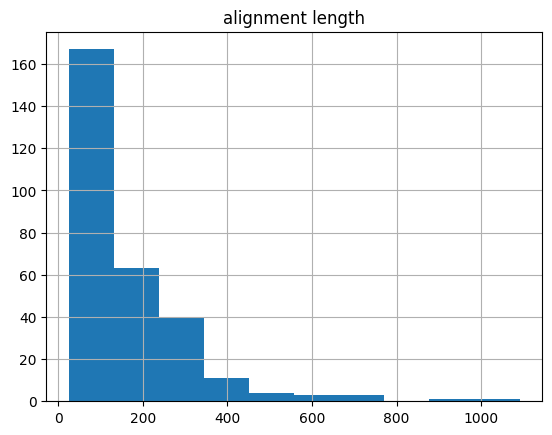

In [50]:
diamond.hist("alignment length")

array([[<Axes: title={'center': '% identity'}>]], dtype=object)

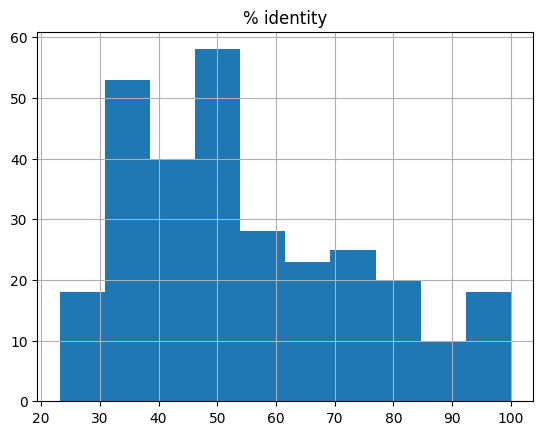

In [51]:
diamond.hist("% identity")

In [52]:
diamond

,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
Query id,,,,,,,,,,,
TRINITY_DN8333_c0_g1_i5,BAJ97774.1|GT2|,99.9,1091,1,0,280,3552,1,1091,0.000000e+00,2266.0
TRINITY_DN26643_c0_g1_i3,AAO46087.1|GT48|,98.5,717,11,0,3,2153,745,1461,0.000000e+00,1403.0
TRINITY_DN14208_c0_g1_i5,AHG54199.1|CBM57,80.1,959,172,7,1,2835,61,1014,0.000000e+00,1314.0
TRINITY_DN12939_c0_g1_i1,BAB82469.1|GH32|2.4.1.10,98.4,616,10,0,52,1899,1,616,0.000000e+00,1244.0
TRINITY_DN15106_c0_g1_i2,CCV01574.1|GT47|,98.3,421,7,0,212,1474,1,421,9.230000e-316,860.0
...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN185976_c1_g1_i1,QAT16263.1|GH133|GH13|GH23|GH2|GT2|GT4|GT5|,42.4,66,35,2,26,217,10657,10721,2.700000e-05,45.4
TRINITY_DN559881_c0_g1_i1,AWX44852.1|GH0,28.8,125,67,5,10,342,41,157,4.430000e-05,47.8
TRINITY_DN382217_c0_g1_i1,AWP12966.1|GT68|,32.4,74,49,1,20,238,3410,3483,5.050000e-05,44.3


Text(0, 0.5, 'Mistmatches')

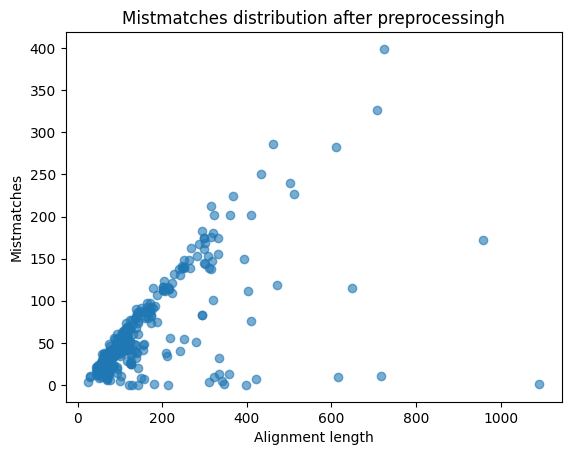

In [53]:
plt.scatter(diamond["alignment length"], diamond.mismatches, alpha=0.6)
plt.title("Mistmatches distribution after preprocessingh")
plt.xlabel("Alignment length")
plt.ylabel("Mistmatches")

## Attention !!
Please, consider the previous information to set the threshold for the e-value and the % identity.

### Merging aligned genes and count table
First, we are going to drop all columns except for ContigsID and orthologous genes header (to obtain map table). 

In [54]:
map_table = diamond[["Subject id"]]
map_table

,Subject id
Query id,
TRINITY_DN8333_c0_g1_i5,BAJ97774.1|GT2|
TRINITY_DN26643_c0_g1_i3,AAO46087.1|GT48|
TRINITY_DN14208_c0_g1_i5,AHG54199.1|CBM57
TRINITY_DN12939_c0_g1_i1,BAB82469.1|GH32|2.4.1.10
TRINITY_DN15106_c0_g1_i2,CCV01574.1|GT47|
...,...
TRINITY_DN185976_c1_g1_i1,QAT16263.1|GH133|GH13|GH23|GH2|GT2|GT4|GT5|
TRINITY_DN559881_c0_g1_i1,AWX44852.1|GH0
TRINITY_DN382217_c0_g1_i1,AWP12966.1|GT68|


Now, we are going to merge both files by their column in common (ContigID and Subject id).

In [55]:
df = pd.merge(map_table, counts, left_index=True, right_index=True).reset_index(
    drop=True
)
df

,Subject id,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,...,ML11,ML26,ML30,ML12,ML3,ML10,ML2,ML28,ML15,ML7
0,BAJ97774.1|GT2|,4,0,35,4,1,3,1,1,1,...,3,1,3,0,2,0,2,54,2,3
1,AAO46087.1|GT48|,10,1,0,0,5,0,1,0,5,...,24,53,1,13,0,57,0,0,3,25
2,AHG54199.1|CBM57,0,2,0,0,73,18,2,49,1,...,1,0,58,0,0,0,1,1,0,2
3,BAB82469.1|GH32|2.4.1.10,6,11,5,0,28,6,12,16,9,...,2,9,19,8,16,4,2,5,5,4
4,CCV01574.1|GT47|,22,18,0,2,6,22,11,2,10,...,4,14,2,4,21,20,26,0,9,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,QAT16263.1|GH133|GH13|GH23|GH2|GT2|GT4|GT5|,44,181,2,0,48,201,49,17,49,...,12,80,87,77,10,64,9,0,112,90
289,AWX44852.1|GH0,0,0,8,30,2,0,0,0,0,...,0,0,0,0,0,0,0,37,0,0
290,AWP12966.1|GT68|,3,21,0,0,7,54,6,0,5,...,0,9,5,3,0,5,1,0,10,23
291,ADP19604.1|GT2|,0,0,0,0,0,0,0,0,0,...,0,0,0,0,49,0,0,0,0,0


### Aggregate table
Now, we are going to aggregate the rows by grouping by "Subject id" (notice the difference in rows between the previous table and the following):

In [56]:
df = df.groupby("Subject id").sum(numeric_only=True)
df

,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,ML19,...,ML11,ML26,ML30,ML12,ML3,ML10,ML2,ML28,ML15,ML7
Subject id,,,,,,,,,,,,,,,,,,,,,
AAF16649.1|CE8|,0,2,106,12,0,0,0,0,0,128,...,0,0,0,0,0,0,0,107,0,0
AAL01718.1|AA10|,4,55,0,0,21,93,36,6,21,6,...,62,25,34,7,119,5,39,0,24,42
AAM08620.1|GH5_14|,5,3,31,12,9,13,0,2,8,2,...,9,9,3,1,2,1,0,0,4,2
AAO46087.1|GT48|,10,1,0,0,5,0,1,0,5,0,...,24,53,1,13,0,57,0,0,3,25
AAR29967.1|GT2|,8,8,0,0,4,4,26,0,8,0,...,22,16,0,4,14,12,18,2,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VUW59753.1|GT106|,10,10,4,25,14,0,0,8,0,4,...,0,0,2,6,2,0,0,4,0,16
VUW60155.1|AA2|,11,18,6,0,10,11,15,6,7,15,...,8,8,5,2,11,7,23,7,8,11
VUW72999.1|AA1|,140,40,4,6,292,1157,51,8,43,2,...,68,298,537,62,142,116,60,2,88,106


## Annotating count table

First, we define some helper functions:

In [57]:
import re
import doctest


def extract_CAZyDB_id(x: str) -> list[str]:
    """
    >>> extract_CAZyDB_id('XP_503149.1|GH18')
    ['GH18']
    >>> extract_CAZyDB_id('AAA52077.1|CBM8|3.2.1.4')
    ['CBM8']
    >>> extract_CAZyDB_id('AAA52077.1|CBM8|3.2.1.4|GH18')
    ['CBM8', 'GH18']
    """
    return [elm for elm in x.split("|")[1:] if not re.match(r"^\d", elm)]


def get_annotation_from_CAZyDB_id(x: str) -> str:
    """
    >>> get_annotation_from_CAZyDB_id('GH31')
    'Glycoside Hydrolases'
    >>> get_annotation_from_CAZyDB_id('GT75')
    'GlycosylTransferases'
    >>> get_annotation_from_CAZyDB_id('AA5')
    'Auxiliary Activities'
    >>> get_annotation_from_CAZyDB_id('QAT16263.1')
    ''
    """
    symbols = {
        "GH": "Glycoside Hydrolases",
        "GT": "GlycosylTransferases",
        "PL": "Polysaccharide Lyases",
        "CE": "Carbohydrate Esterases",
        "AA": "Auxiliary Activities",
        "CBM": "Carbohydrate-Binding Modules",
    }
    for k in symbols.keys():
        regex = "^" + k
        if re.match(regex, x):
            return symbols[k]
    return ""


# Run tests
doctest.testmod()

TestResults(failed=0, attempted=7)

In [58]:
df["CAZyDB_id"] = [[y for y in extract_CAZyDB_id(x) if y] for x in df.index]
df

,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,ML19,...,ML26,ML30,ML12,ML3,ML10,ML2,ML28,ML15,ML7,CAZyDB_id
Subject id,,,,,,,,,,,,,,,,,,,,,
AAF16649.1|CE8|,0,2,106,12,0,0,0,0,0,128,...,0,0,0,0,0,0,107,0,0,[CE8]
AAL01718.1|AA10|,4,55,0,0,21,93,36,6,21,6,...,25,34,7,119,5,39,0,24,42,[AA10]
AAM08620.1|GH5_14|,5,3,31,12,9,13,0,2,8,2,...,9,3,1,2,1,0,0,4,2,[GH5_14]
AAO46087.1|GT48|,10,1,0,0,5,0,1,0,5,0,...,53,1,13,0,57,0,0,3,25,[GT48]
AAR29967.1|GT2|,8,8,0,0,4,4,26,0,8,0,...,16,0,4,14,12,18,2,6,14,[GT2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VUW59753.1|GT106|,10,10,4,25,14,0,0,8,0,4,...,0,2,6,2,0,0,4,0,16,[GT106]
VUW60155.1|AA2|,11,18,6,0,10,11,15,6,7,15,...,8,5,2,11,7,23,7,8,11,[AA2]
VUW72999.1|AA1|,140,40,4,6,292,1157,51,8,43,2,...,298,537,62,142,116,60,2,88,106,[AA1]


Now, we want to extend the table by using the CAZyDB_id column (which is a list of list). Every row will have one CAZyDB_id.

In [59]:
df = df.explode("CAZyDB_id")
df

,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,ML19,...,ML26,ML30,ML12,ML3,ML10,ML2,ML28,ML15,ML7,CAZyDB_id
Subject id,,,,,,,,,,,,,,,,,,,,,
AAF16649.1|CE8|,0,2,106,12,0,0,0,0,0,128,...,0,0,0,0,0,0,107,0,0,CE8
AAL01718.1|AA10|,4,55,0,0,21,93,36,6,21,6,...,25,34,7,119,5,39,0,24,42,AA10
AAM08620.1|GH5_14|,5,3,31,12,9,13,0,2,8,2,...,9,3,1,2,1,0,0,4,2,GH5_14
AAO46087.1|GT48|,10,1,0,0,5,0,1,0,5,0,...,53,1,13,0,57,0,0,3,25,GT48
AAR29967.1|GT2|,8,8,0,0,4,4,26,0,8,0,...,16,0,4,14,12,18,2,6,14,GT2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VUW59753.1|GT106|,10,10,4,25,14,0,0,8,0,4,...,0,2,6,2,0,0,4,0,16,GT106
VUW60155.1|AA2|,11,18,6,0,10,11,15,6,7,15,...,8,5,2,11,7,23,7,8,11,AA2
VUW72999.1|AA1|,140,40,4,6,292,1157,51,8,43,2,...,298,537,62,142,116,60,2,88,106,AA1


Now we can annotate the count table:

In [60]:
df["Level1"] = [get_annotation_from_CAZyDB_id(elm) for elm in df.CAZyDB_id]
df

,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,ML19,...,ML30,ML12,ML3,ML10,ML2,ML28,ML15,ML7,CAZyDB_id,Level1
Subject id,,,,,,,,,,,,,,,,,,,,,
AAF16649.1|CE8|,0,2,106,12,0,0,0,0,0,128,...,0,0,0,0,0,107,0,0,CE8,Carbohydrate Esterases
AAL01718.1|AA10|,4,55,0,0,21,93,36,6,21,6,...,34,7,119,5,39,0,24,42,AA10,Auxiliary Activities
AAM08620.1|GH5_14|,5,3,31,12,9,13,0,2,8,2,...,3,1,2,1,0,0,4,2,GH5_14,Glycoside Hydrolases
AAO46087.1|GT48|,10,1,0,0,5,0,1,0,5,0,...,1,13,0,57,0,0,3,25,GT48,GlycosylTransferases
AAR29967.1|GT2|,8,8,0,0,4,4,26,0,8,0,...,0,4,14,12,18,2,6,14,GT2,GlycosylTransferases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VUW59753.1|GT106|,10,10,4,25,14,0,0,8,0,4,...,2,6,2,0,0,4,0,16,GT106,GlycosylTransferases
VUW60155.1|AA2|,11,18,6,0,10,11,15,6,7,15,...,5,2,11,7,23,7,8,11,AA2,Auxiliary Activities
VUW72999.1|AA1|,140,40,4,6,292,1157,51,8,43,2,...,537,62,142,116,60,2,88,106,AA1,Auxiliary Activities


And now we add descriptions: 

In [61]:
# Force the tsv in descriptions_tsv to have two columns
descriptions = pd.read_csv(
    descriptions_tsv, sep="\t", comment="#", header=None, names=["CAZyDB_id", "Level2"]
)
descriptions

,CAZyDB_id,Level2
0,AA0,
1,AA10,AA10 (formerly CBM33) proteins are copper-de...
2,AA11,AA11 proteins are copper-dependent lytic pol...
3,AA12,The pyrroloquinoline quinone-dependent oxido...
4,AA13,AA13 proteins are copper-dependent lytic pol...
...,...,...
441,PL5,"alginate lyase (EC 4.2.2.3); endo-beta-1,4-g..."
442,PL6,alginate lyase (EC 4.2.2.3); chondroitinase ...
443,PL7,poly(beta-mannuronate) lyase / M-specific al...
444,PL8,hyaluronate lyase (EC 4.2.2.1); chondroitin ...


In [62]:
# Rename index to ContigID column and drop index
df = df.reset_index().rename(columns={"index": "ContigID"})
# Add the description to the dataframe
df = pd.merge(df, descriptions, on="CAZyDB_id", how="left")

Now, we are going to count the number of enzymes with more than one annotation:

In [63]:
duplicated = (
    df.groupby("Subject id")
    .agg(
        Level1=("Level1", lambda x: "|".join(set(x))),
        types_of_annotation=("Level1", "nunique"),
        n_cazy_ids=("CAZyDB_id", "nunique"),
    )
    .reset_index()
    .loc[lambda x: x.n_cazy_ids > 1]
    .set_index("Subject id")
)
duplicated.to_csv("duplicated_ann_CAZy.tsv", sep="\t")
duplicated

,Level1,types_of_annotation,n_cazy_ids
Subject id,,,
ACT02684.1|CBM35|GH87|,Glycoside Hydrolases|Carbohydrate-Binding Modules,2,2
ADQ45029.1|CBM32|GH55|,Glycoside Hydrolases|Carbohydrate-Binding Modules,2,2
AMP17377.1|CBM50|GH73|,Glycoside Hydrolases|Carbohydrate-Binding Modules,2,2
ANZ41201.1|CBM13|CBM6|,Carbohydrate-Binding Modules,1,2
AUI40767.1|CE1|GH23|,Carbohydrate Esterases|Glycoside Hydrolases,2,2
AWP09643.1|CBM13|GT27|,GlycosylTransferases|Carbohydrate-Binding Modules,2,2
AWV04356.1|GH94|GT84|,Glycoside Hydrolases|GlycosylTransferases,2,2
AYA39814.1|CBM5|GH19|,Glycoside Hydrolases|Carbohydrate-Binding Modules,2,2
BAC83070.1|CBM43|GH17|,Glycoside Hydrolases|Carbohydrate-Binding Modules,2,2


In [64]:
df

,Subject id,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,...,ML12,ML3,ML10,ML2,ML28,ML15,ML7,CAZyDB_id,Level1,Level2
0,AAF16649.1|CE8|,0,2,106,12,0,0,0,0,0,...,0,0,0,0,107,0,0,CE8,Carbohydrate Esterases,pectin methylesterase (EC 3.1.1.11).
1,AAL01718.1|AA10|,4,55,0,0,21,93,36,6,21,...,7,119,5,39,0,24,42,AA10,Auxiliary Activities,AA10 (formerly CBM33) proteins are copper-de...
2,AAM08620.1|GH5_14|,5,3,31,12,9,13,0,2,8,...,1,2,1,0,0,4,2,GH5_14,Glycoside Hydrolases,NaN
3,AAO46087.1|GT48|,10,1,0,0,5,0,1,0,5,...,13,0,57,0,0,3,25,GT48,GlycosylTransferases,"1,3-beta-glucan synthase (EC 2.4.1.34)"
4,AAR29967.1|GT2|,8,8,0,0,4,4,26,0,8,...,4,14,12,18,2,6,14,GT2,GlycosylTransferases,cellulose synthase (EC 2.4.1.12); chitin syn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,VUW59753.1|GT106|,10,10,4,25,14,0,0,8,0,...,6,2,0,0,4,0,16,GT106,GlycosylTransferases,UDP-beta-L-rhamnose:rhamnogalacturonan I 4-a...
229,VUW60155.1|AA2|,11,18,6,0,10,11,15,6,7,...,2,11,7,23,7,8,11,AA2,Auxiliary Activities,manganese peroxidase (EC 1.11.1.13); versati...
230,VUW72999.1|AA1|,140,40,4,6,292,1157,51,8,43,...,62,142,116,60,2,88,106,AA1,Auxiliary Activities,Laccase / p-diphenol:oxygen oxidoreductase /...
231,XP_367690.1|GH20|,29,16,289,12,18,52,8,4,10,...,10,22,34,8,10,41,30,GH20,Glycoside Hydrolases,beta-hexosaminidase (EC 3.2.1.52); lacto-N-b...


In [65]:
df

,Subject id,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,...,ML12,ML3,ML10,ML2,ML28,ML15,ML7,CAZyDB_id,Level1,Level2
0,AAF16649.1|CE8|,0,2,106,12,0,0,0,0,0,...,0,0,0,0,107,0,0,CE8,Carbohydrate Esterases,pectin methylesterase (EC 3.1.1.11).
1,AAL01718.1|AA10|,4,55,0,0,21,93,36,6,21,...,7,119,5,39,0,24,42,AA10,Auxiliary Activities,AA10 (formerly CBM33) proteins are copper-de...
2,AAM08620.1|GH5_14|,5,3,31,12,9,13,0,2,8,...,1,2,1,0,0,4,2,GH5_14,Glycoside Hydrolases,NaN
3,AAO46087.1|GT48|,10,1,0,0,5,0,1,0,5,...,13,0,57,0,0,3,25,GT48,GlycosylTransferases,"1,3-beta-glucan synthase (EC 2.4.1.34)"
4,AAR29967.1|GT2|,8,8,0,0,4,4,26,0,8,...,4,14,12,18,2,6,14,GT2,GlycosylTransferases,cellulose synthase (EC 2.4.1.12); chitin syn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,VUW59753.1|GT106|,10,10,4,25,14,0,0,8,0,...,6,2,0,0,4,0,16,GT106,GlycosylTransferases,UDP-beta-L-rhamnose:rhamnogalacturonan I 4-a...
229,VUW60155.1|AA2|,11,18,6,0,10,11,15,6,7,...,2,11,7,23,7,8,11,AA2,Auxiliary Activities,manganese peroxidase (EC 1.11.1.13); versati...
230,VUW72999.1|AA1|,140,40,4,6,292,1157,51,8,43,...,62,142,116,60,2,88,106,AA1,Auxiliary Activities,Laccase / p-diphenol:oxygen oxidoreductase /...
231,XP_367690.1|GH20|,29,16,289,12,18,52,8,4,10,...,10,22,34,8,10,41,30,GH20,Glycoside Hydrolases,beta-hexosaminidase (EC 3.2.1.52); lacto-N-b...


In [66]:
df.to_csv("../results/mRNA/CAZy_matches_annotated.tsv", sep="\t", index=False)